In [1]:
#let's check whether the card_ids in the train and test sets match each other?

import pandas as pd
df_train=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/train.csv')

In [2]:
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [3]:
df_test=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/test.csv')

In [4]:
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [7]:
df_merge=df_train.merge(df_test, how="inner", on='card_id')

In [8]:
len(df_merge)

0

In [9]:
this means that there are no common values in card_id between these two dataframes
df_merge

,first_active_month_x,card_id,feature_1_x,feature_2_x,feature_3_x,target,first_active_month_y,feature_1_y,feature_2_y,feature_3_y


In [10]:

#split the historical transactions dataset by grouping by the card_id. the idea is to split the card_id that belong to 
# train and test sets separately





import pandas as pd
df_hist_trans=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/historical_transactions.csv')

In [ ]:
# I do not think that separating at this time matters as I am going to transform the features by grouping by card_id so 
# info is not leaked from train to test. so I can do all the transformations in historical_transactions dataset and
# can finally split the train and test


In [11]:
#merchant 
df_merchant=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/merchants.csv')

In [12]:
df_merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [14]:
df_merchant['merchant_id'].value_counts(dropna=False)

M_ID_bd49e37dda    4
M_ID_ebbdb42da6    4
M_ID_42697d5d44    4
M_ID_dbbf07ebf0    4
M_ID_6464db3b45    4
                  ..
M_ID_412ee97dbe    1
M_ID_889c214a80    1
M_ID_5d608984dd    1
M_ID_f9dc62df74    1
M_ID_09f1c8f974    1
Name: merchant_id, Length: 334633, dtype: int64

In [16]:
df_new_merchant=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/new_merchant_transactions.csv')

In [17]:
df_new_merchant.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,3/11/18 14:57,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,3/19/18 18:53,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,4/26/18 14:08,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671926,3/7/18 9:43,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,3/22/18 21:07,NaN,-1,29


In [20]:
df_new_merchant['merchant_id'].value_counts(dropna=False)

NaN                12044
M_ID_cd2c0b07e9     9633
M_ID_00a6ca8a8a     9024
M_ID_50f575c681     6645
M_ID_9139332ccc     6246
                   ...  
M_ID_96f19d9c7b        1
M_ID_30f090be95        1
M_ID_51c9e19098        1
M_ID_0ae305a131        1
M_ID_33480b742f        1
Name: merchant_id, Length: 177802, dtype: int64

In [18]:
#check whether some/many of new merchant_id match with that of merchant_id in merchants file

df_merge_merchants=df_merchant.merge(df_new_merchant, how="inner", on="merchant_id")

In [19]:
#there are common values in the column: merchant_id in the two dataframes: 
len(df_merge_merchants)

1050186

In [ ]:
1. The idea is to group by merchant_id in df_merchant and transform the values in the dataset
2. group by merchant_id in df_merge_merchants and transform the values in the dataset
3. 




In [22]:
df_hist_trans.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [23]:
#Let's first deal with df_merchant

df_merchant.columns


Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [24]:
df_merchant.isnull().sum()*100/len(df_merchant)

merchant_id                    0.000000
merchant_group_id              0.000000
merchant_category_id           0.000000
subsector_id                   0.000000
numerical_1                    0.000000
numerical_2                    0.000000
category_1                     0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_sales_lag3                 0.003884
avg_purchases_lag3             0.000000
active_months_lag3             0.000000
avg_sales_lag6                 0.003884
avg_purchases_lag6             0.000000
active_months_lag6             0.000000
avg_sales_lag12                0.003884
avg_purchases_lag12            0.000000
active_months_lag12            0.000000
category_4                     0.000000
city_id                        0.000000
state_id                       0.000000
category_2                     3.551581
dtype: float64

In [ ]:
#why would null values exist in average sales? 
#may be because customers did not buy from those merchants in the past specific months so while calculating the lagged values 
#it might have returned null values



In [25]:
df_merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [28]:
df_merchant['numerical_1'].value_counts(dropna=False)

-0.057471      228788
-0.047556       41528
-0.037641       15689
-0.027726        8297
-0.017811        5249
                ...  
 8.836199           1
 53.641651          1
 150.430948         1
 3.541640           1
 9.589731           1
Name: numerical_1, Length: 954, dtype: int64

In [29]:
df_merchant['category_1'].value_counts(dropna=False)

N    327657
Y      7039
Name: category_1, dtype: int64

In [31]:
import numpy as np
df_merchant['category_1']=np.where(df_merchant['category_1']=='N', 0, 1)


In [32]:
df_merchant['category_1'].value_counts(dropna=False)

0    327657
1      7039
Name: category_1, dtype: int64

In [33]:
df_merchant['category_4'].value_counts(dropna=False)

N    238596
Y     96100
Name: category_4, dtype: int64

In [34]:
df_merchant['category_4']=np.where(df_merchant['category_4']=='N', 0, 1)


In [41]:
#Let's first most_recent_sales_range	most_recent_purchases_range based on the condition: A > B > C > D > E
#dont run this cell as such. I did a mistake by assigning 1.0 to "E" therefore changed it to 0.2 the way it looks here


df_merchant.loc[df_merchant['most_recent_sales_range']==1.0, 'most_recent_sales_range']=0.2

In [44]:
df_merchant['most_recent_sales_range'].value_counts(dropna=False)

0.2    177104
0.4    117475
0.6     34075
0.8      5037
1.0      1005
Name: most_recent_sales_range, dtype: int64

In [43]:
df_merchant.loc[df_merchant['most_recent_sales_range']=="D", 'most_recent_sales_range']=0.4
df_merchant.loc[df_merchant['most_recent_sales_range']=="C", 'most_recent_sales_range']=0.6
df_merchant.loc[df_merchant['most_recent_sales_range']=="B", 'most_recent_sales_range']=0.8
df_merchant.loc[df_merchant['most_recent_sales_range']=="A", 'most_recent_sales_range']=1.0

In [45]:
#likewise change the values in the column: most_recent_purchases_range. it may be redundant as it may be the same
#as the 'most_recent_sales_range' but let check it anyways

df_merchant.loc[df_merchant['most_recent_purchases_range']=="E", 'most_recent_purchases_range']=0.2
df_merchant.loc[df_merchant['most_recent_purchases_range']=="D", 'most_recent_purchases_range']=0.4
df_merchant.loc[df_merchant['most_recent_purchases_range']=="C", 'most_recent_purchases_range']=0.6
df_merchant.loc[df_merchant['most_recent_purchases_range']=="B", 'most_recent_purchases_range']=0.8
df_merchant.loc[df_merchant['most_recent_purchases_range']=="A", 'most_recent_purchases_range']=1.0

In [46]:
# Not a whole lot of changes though. so can be dropped
df_merchant['most_recent_purchases_range'].value_counts(dropna=False)

0.2    175309
0.4    119187
0.6     34144
0.8      5046
1.0      1010
Name: most_recent_purchases_range, dtype: int64

In [ ]:
avg_sales: Monthly average of revenue in last 3 months divided by revenue in last active month

In [47]:
#these are the categories with null values in the column: avg_sales_lag3
df_merchant.loc[df_merchant['avg_sales_lag3'].isnull(), "merchant_group_id"]

3       5026
4       2228
5      20201
6      33861
7      16430
8      37179
9     112122
10     13462
11     17123
12      2118
13     15040
14     25449
15       321
Name: merchant_group_id, dtype: int64

In [48]:
Just wanted to check whether I got the correct answer in the cell above

here the value on the left is the 'merchant_group_id' and the one on the right is the count (the number of times it occurred)

df_merchant['merchant_group_id'].value_counts(dropna=False)

35       46026
434        482
419        365
713        333
3648       305
         ...  
36255        1
95648        1
97697        1
91554        1
26487        1
Name: merchant_group_id, Length: 109391, dtype: int64

In [49]:
df_merchant.loc[df_merchant['avg_sales_lag6'].isnull(), "merchant_group_id"]

3       5026
4       2228
5      20201
6      33861
7      16430
8      37179
9     112122
10     13462
11     17123
12      2118
13     15040
14     25449
15       321
Name: merchant_group_id, dtype: int64

In [50]:
the value on the right is the "merchant_group_id" and the one on the left is the serial number

df_merchant.loc[df_merchant['avg_sales_lag12'].isnull(), "merchant_group_id"]

3       5026
4       2228
5      20201
6      33861
7      16430
8      37179
9     112122
10     13462
11     17123
12      2118
13     15040
14     25449
15       321
Name: merchant_group_id, dtype: int64

In [54]:
df_merchant.loc[df_merchant['category_2'].isnull(), "merchant_group_id"]

3           5026
4           2228
7          16430
9         112122
11         17123
           ...  
334686    107283
334688     17285
334690        35
334692        35
334694        35
Name: merchant_group_id, Length: 11887, dtype: int64

In [55]:
# because there are not many Null values in avg_sales_lag3, avg_sales_lag6, and avg_sales_lag12, I can simply drop them

df_merchant.dropna(subset=['avg_sales_lag3'], inplace = True)

In [56]:
# I had to drop only once as those are the same rows that had null values in the columns: 'avg_sales_lag6', 'avg_sales_lag12'
df_merchant.loc[df_merchant['avg_sales_lag12'].isnull(), "merchant_group_id"]

Series([], Name: merchant_group_id, dtype: int64)

In [57]:
df_merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,0,0.2,0.2,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,0,0.2,0.2,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,0,0.2,0.2,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,0,-1,5,5.0
16,M_ID_c929bb59af,9514,2,20,-0.057471,-0.057471,0,0.2,0.2,69667.00,...,69667.00,1.000000,3,69667.00,1.000000,3,0,-1,20,5.0
17,M_ID_dd3ae3de10,30534,278,37,-0.057471,-0.057471,0,0.2,0.2,5180.00,...,9830.00,4.166667,6,15826.00,5.600000,10,1,11,23,2.0


In [58]:
numeric_feats = df_merchant.dtypes[df_merchant.dtypes != "object"].index

In [59]:
numeric_feats

Index(['merchant_group_id', 'merchant_category_id', 'subsector_id',
       'numerical_1', 'numerical_2', 'category_1', 'avg_sales_lag3',
       'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6',
       'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12',
       'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id',
       'state_id', 'category_2'],
      dtype='object')

In [60]:
df_merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [63]:
df_merchant['category_4'].value_counts(dropna=False)

0    238592
1     96091
Name: category_4, dtype: int64

In [67]:
df_merchant['category_2'].value_counts(dropna=False)

1.0    160882
5.0     52922
3.0     51887
4.0     36450
2.0     20661
NaN     11881
Name: category_2, dtype: int64

In [ ]:
#category_2 values seemed to have been affected by avg_sales_lag12, avg_sales_lag6,avg_sales_lag3

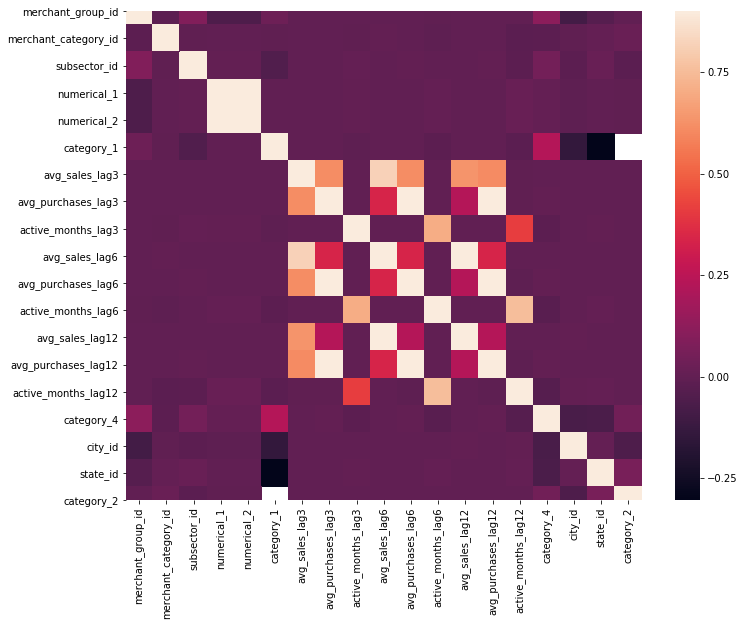

In [62]:
#Correlation map to see how numerical features are correlated with SalePrice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = df_merchant.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
from the correlation map the following can be clearly deduced:

no correlation between state_id and category_1
as obvious it is there the lagged_sales and lagged_purchase values are correlated with variations in their strength


active_months and purchases seemed to be correlated as well

active_months_lag12 strongly correlated with active_months_lag3

avg_purchases_lag3 strongly correlated with avg_purchases_lag12

active_months_lag3 strongly correlated with active_months_lag6 - as obviously there is an overlap

no correlation between category_1 and category_2

but correlation seems to exists between category_1 and category_4 - because both are binary values



avg_sales_lag6 strongly correlated with avg_purchases_lag12 - this is interesting 

but avg_sales_lag12 not strongly correlated with avg_purchases_lag6

likewise avg_sales_lag3 correlated with avg_purchases_lag12 and avg_purchases_lag6 and also sales in those months

no wonder they seems to exists strong correlations amongst sales and purchases as many values are similar and they overlap

So I do not have to include everything. maybe after combining with the score value in the transactions dataset, I can drop 
those that are strongly correlated

one thing is clear: sales happened in the previous months affect purchases in the later months, but they may be not 
redundant!

In [ ]:
Based on the above I am going to retain the sales values in the previous months and purchase values in the later months



In [64]:
df_merchant.drop(['avg_purchases_lag3', 'avg_purchases_lag6'], axis=1, inplace=True)

In [65]:
df_merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'active_months_lag3', 'avg_sales_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4', 'city_id', 'state_id',
       'category_2'],
      dtype='object')

In [66]:
# Maybe I can drop 'active_months_lag6' as there seems to be overlap!

df_merchant.drop('active_months_lag6', axis=1, inplace=True)

In [68]:
df_merchant.loc[df_merchant['category_2'].isnull(), "merchant_group_id"]

48          5670
52          8533
74         43601
111           35
112           35
           ...  
334686    107283
334688     17285
334690        35
334692        35
334694        35
Name: merchant_group_id, Length: 11881, dtype: int64

In [69]:
df_merchant.loc[df_merchant['category_2'].isnull(), "merchant_id"]

48        M_ID_68d5721729
52        M_ID_44384f4b59
74        M_ID_64eacbe6fd
111       M_ID_0039220eb3
112       M_ID_0039220eb3
               ...       
334686    M_ID_3111c6df35
334688    M_ID_59764e8cb1
334690    M_ID_a9d91682ad
334692    M_ID_725a60d404
334694    M_ID_9139332ccc
Name: merchant_id, Length: 11881, dtype: object

In [71]:
df_merchant['category_2'] = df_merchant['category_2'].fillna(df_merchant.groupby('merchant_id')['category_2'].transform('median'))

In [ ]:
after grouping by the above cell the null values still existed

In [73]:
df_merchant.loc[df_merchant['category_2'].isnull(), "subsector_id"]

48        29
52        29
74        21
111        5
112        5
          ..
334686     1
334688    21
334690    17
334692    29
334694     7
Name: subsector_id, Length: 11881, dtype: int64

In [76]:
now this is a series analysis using data :) turns out all the null values in category_2 exist from one city with code -1
there are 11881 values of the city with the code -1 so it is not wise to drop all the values so have to impute
    
df_merchant.loc[df_merchant['category_2'].isnull(), "city_id"].unique()

array([-1])

In [83]:
looks like only for category_2 the city with code "-1" has null values


In [78]:
len(df_merchant['category_2'])

334683

In [82]:
df_merchant.loc[df_merchant['category_2'].isnull(), "city_id"]

48       -1
52       -1
74       -1
111      -1
112      -1
         ..
334686   -1
334688   -1
334690   -1
334692   -1
334694   -1
Name: city_id, Length: 11881, dtype: int64

In [84]:
df_merchant.loc[df_merchant['city_id']=="-1", "category_2"].unique()

array([], dtype=float64)

In [ ]:
df_merchant['category_2'] = df_merchant['category_2'].fillna(df_merchant.groupby('merchant_id')['category_2'].transform('median'))

In [72]:
df_merchant.isnull().sum()*100/len(df_merchant)

merchant_id                    0.000000
merchant_group_id              0.000000
merchant_category_id           0.000000
subsector_id                   0.000000
numerical_1                    0.000000
numerical_2                    0.000000
category_1                     0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_sales_lag3                 0.000000
active_months_lag3             0.000000
avg_sales_lag6                 0.000000
avg_sales_lag12                0.000000
avg_purchases_lag12            0.000000
active_months_lag12            0.000000
category_4                     0.000000
city_id                        0.000000
state_id                       0.000000
category_2                     3.549926
dtype: float64

In [85]:
df_merchant['category_2'].fillna(0, inplace=True)

In [86]:
df_merchant.isnull().sum()*100/len(df_merchant)

merchant_id                    0.0
merchant_group_id              0.0
merchant_category_id           0.0
subsector_id                   0.0
numerical_1                    0.0
numerical_2                    0.0
category_1                     0.0
most_recent_sales_range        0.0
most_recent_purchases_range    0.0
avg_sales_lag3                 0.0
active_months_lag3             0.0
avg_sales_lag6                 0.0
avg_sales_lag12                0.0
avg_purchases_lag12            0.0
active_months_lag12            0.0
category_4                     0.0
city_id                        0.0
state_id                       0.0
category_2                     0.0
dtype: float64

In [87]:
df_merchant.to_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/df_merchant_improved.csv', index=False)

In [88]:
df_merchant_improved=pd.read_csv('/Users/chidam/Desktop/Elo Merchant Category Recommendation/df_merchant_improved.csv')

In [89]:
df_merchant_improved.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,active_months_lag3,avg_sales_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,0,0.2,0.2,-0.40,3,-2.25,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,0,0.2,0.2,-0.72,3,-0.74,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,0,0.2,0.2,-82.13,2,-82.13,-82.13,260.000000,2,0,-1,5,5.0
3,M_ID_c929bb59af,9514,2,20,-0.057471,-0.057471,0,0.2,0.2,69667.00,3,69667.00,69667.00,1.000000,3,0,-1,20,5.0
4,M_ID_dd3ae3de10,30534,278,37,-0.057471,-0.057471,0,0.2,0.2,5180.00,3,9830.00,15826.00,5.600000,10,1,11,23,2.0


In [90]:
df_merchant_improved.isnull().sum()*100/len(df_merchant_improved)

merchant_id                    0.0
merchant_group_id              0.0
merchant_category_id           0.0
subsector_id                   0.0
numerical_1                    0.0
numerical_2                    0.0
category_1                     0.0
most_recent_sales_range        0.0
most_recent_purchases_range    0.0
avg_sales_lag3                 0.0
active_months_lag3             0.0
avg_sales_lag6                 0.0
avg_sales_lag12                0.0
avg_purchases_lag12            0.0
active_months_lag12            0.0
category_4                     0.0
city_id                        0.0
state_id                       0.0
category_2                     0.0
dtype: float64

In [91]:
len(df_merchant_improved)

334683

In [ ]:
Cool! Yay!